# Imports

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Data

In [2]:
df = pd.read_csv('CC GENERAL.csv')

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
df.drop('CUST_ID', axis = 1, inplace = True)

In [7]:
# filling null values
df.fillna(df.mean(), inplace = True)

# Identifying and excluding outliers

In [9]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<AxesSubplot:>

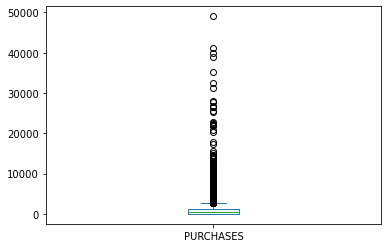

In [10]:
df['PURCHASES'].plot.box()

In [11]:
media = df.mean()
desvio_padrao = df.std()
limite_superior = media + 3 * desvio_padrao
limite_inferior = media - 3 * desvio_padrao
outliers = df[(df > limite_superior) | (df < limite_inferior)].stack()

print("Média: ", media)
print()
print("Desvio Padrão: ", desvio_padrao)
print()
print("Limite Superior: ", limite_superior)
print()
print("Limite Inferior: ", limite_inferior)
print()
print("Outliers: ", outliers)

Média:  BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

Desvio Padrão:  BALANCE                             2081.531879
BALANCE_FREQUENCY                      0.236904
PURCHASES                           2136.634782


In [12]:
df_clean = df.drop(outliers.index.get_level_values(0))

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7434 entries, 0 to 8880
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7434 non-null   float64
 1   BALANCE_FREQUENCY                 7434 non-null   float64
 2   PURCHASES                         7434 non-null   float64
 3   ONEOFF_PURCHASES                  7434 non-null   float64
 4   INSTALLMENTS_PURCHASES            7434 non-null   float64
 5   CASH_ADVANCE                      7434 non-null   float64
 6   PURCHASES_FREQUENCY               7434 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7434 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  7434 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            7434 non-null   float64
 10  CASH_ADVANCE_TRX                  7434 non-null   int64  
 11  PURCHASES_TRX                     7434 non-null   int64  
 12  CREDIT

# Correlation

<AxesSubplot:>

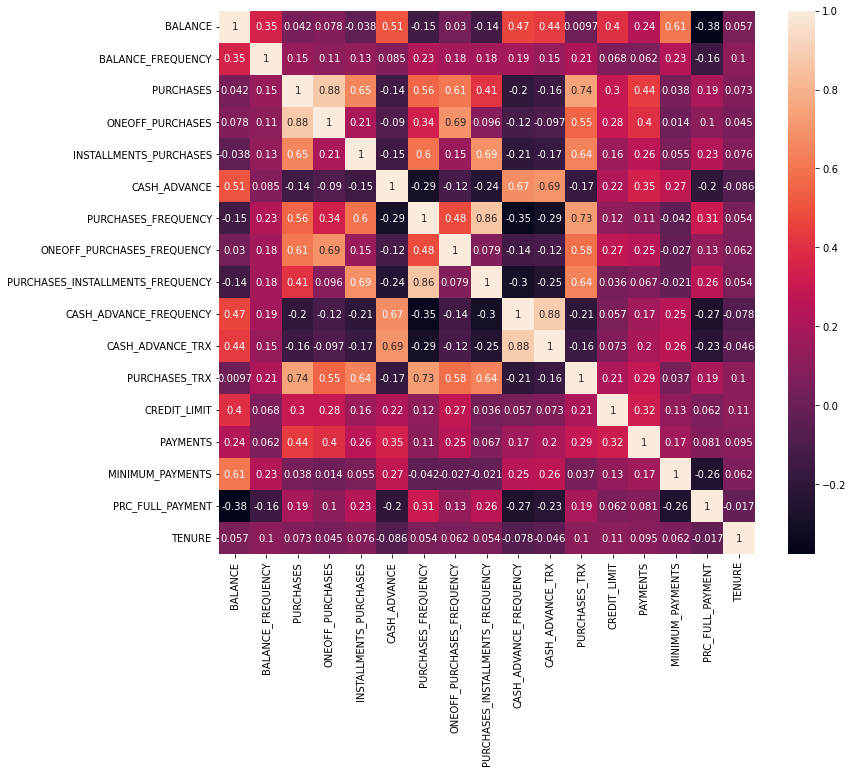

In [15]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_clean.corr(), annot = True)

# Determining the number of clusters

In [21]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,31):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(df_clean)
    wcss.append(kmeans.inertia_)
    print('WCSS for k = {}: {:<.3f}'.format(i, kmeans.inertia_))

WCSS for k = 1: 126759741463.453
WCSS for k = 2: 74629888182.836
WCSS for k = 3: 62985400623.802
WCSS for k = 4: 54998421121.248
WCSS for k = 5: 49268371490.097
WCSS for k = 6: 44986048539.760
WCSS for k = 7: 41333881868.090
WCSS for k = 8: 38572370442.155
WCSS for k = 9: 36523217878.057
WCSS for k = 10: 34467562963.525
WCSS for k = 11: 32801526560.799
WCSS for k = 12: 31405598398.698
WCSS for k = 13: 30077123872.015
WCSS for k = 14: 29215023753.261
WCSS for k = 15: 27982094620.025
WCSS for k = 16: 27057530293.005
WCSS for k = 17: 26191066021.183
WCSS for k = 18: 25477049780.107
WCSS for k = 19: 24716918046.413
WCSS for k = 20: 24053036392.443
WCSS for k = 21: 23340024332.550
WCSS for k = 22: 22784318958.934
WCSS for k = 23: 22287302259.508
WCSS for k = 24: 21745481569.854
WCSS for k = 25: 21382199810.972
WCSS for k = 26: 20800582111.094
WCSS for k = 27: 20570009113.502
WCSS for k = 28: 19960922389.469
WCSS for k = 29: 19659923737.772
WCSS for k = 30: 19391677898.930


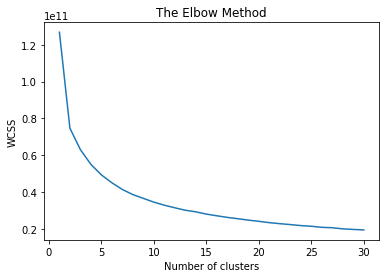

In [24]:
plt.plot(range(1,31),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Application of K-means and PCA for Dimension Reduction

In [48]:
# Data
ss = StandardScaler()
X = ss.fit_transform(df_clean)

# Reducing Dimensions
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)
print(X_pca.shape)
# Fit KMeans
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_pca)
pred = kmeans.predict(X_pca)

(7434, 2)


# Plotting the clusters

In [30]:
from sklearn.cluster import KMeans
wcss = []
for i in range (1,31):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)
    print('WCSS for k = {}: {:<.3f}'.format(i, kmeans.inertia_))

WCSS for k = 1: 74388.031
WCSS for k = 2: 49870.120
WCSS for k = 3: 35038.663
WCSS for k = 4: 26369.475
WCSS for k = 5: 22768.418
WCSS for k = 6: 19766.704
WCSS for k = 7: 17548.109
WCSS for k = 8: 15773.266
WCSS for k = 9: 14646.520
WCSS for k = 10: 13674.453
WCSS for k = 11: 12792.233
WCSS for k = 12: 11995.967
WCSS for k = 13: 11388.856
WCSS for k = 14: 10818.975
WCSS for k = 15: 10275.993
WCSS for k = 16: 9750.605
WCSS for k = 17: 9310.614
WCSS for k = 18: 8991.278
WCSS for k = 19: 8685.711
WCSS for k = 20: 8405.730
WCSS for k = 21: 8136.472
WCSS for k = 22: 7927.318
WCSS for k = 23: 7623.767
WCSS for k = 24: 7443.099
WCSS for k = 25: 7238.203
WCSS for k = 26: 7020.696
WCSS for k = 27: 6890.407
WCSS for k = 28: 6726.283
WCSS for k = 29: 6532.314
WCSS for k = 30: 6386.606


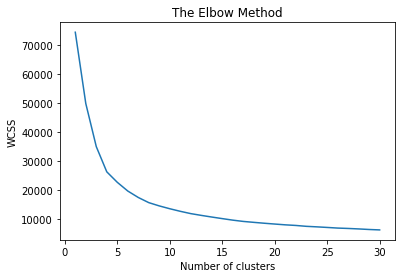

In [31]:
plt.plot(range(1,31),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

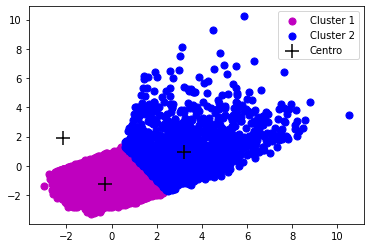

In [50]:
cores = ['m', 'b']
for i in range(len(cores)):
    plt.scatter(X_pca[pred == i, 0], X_pca[pred == i, 1], s = 50, c = cores[i], label = 'Cluster ' + str(i + 1))
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, marker = '+', c = 'black', label = 'Centro')
plt.legend()
plt.show()

_

In [63]:
limit = int((df_clean.shape[0] // 2) ** 0.4)
  
for k in range(2, limit + 1):
    model = GaussianMixture(k)
    model.fit(df_clean)
    pred = model.predict(df_clean)
    score = silhouette_score(df_clean, pred)
    
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score)) 

Silhouette Score for k = 2: -0.022
Silhouette Score for k = 3: 0.004
Silhouette Score for k = 4: -0.106
Silhouette Score for k = 5: -0.106
Silhouette Score for k = 6: -0.094
Silhouette Score for k = 7: -0.086
Silhouette Score for k = 8: -0.102
Silhouette Score for k = 9: -0.102
Silhouette Score for k = 10: -0.164
Silhouette Score for k = 11: -0.328
Silhouette Score for k = 12: -0.322
Silhouette Score for k = 13: -0.177
Silhouette Score for k = 14: -0.320
Silhouette Score for k = 15: -0.340
Silhouette Score for k = 16: -0.232
Silhouette Score for k = 17: -0.261
Silhouette Score for k = 18: -0.222
Silhouette Score for k = 19: -0.277
Silhouette Score for k = 20: -0.233
Silhouette Score for k = 21: -0.281
Silhouette Score for k = 22: -0.265
Silhouette Score for k = 23: -0.192
Silhouette Score for k = 24: -0.236
Silhouette Score for k = 25: -0.310
Silhouette Score for k = 26: -0.352


Text(0.5, 0, 'Number of Clusters')

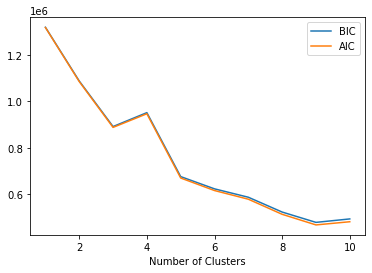

In [64]:
n_components = np.arange(1, 11)

models = [GaussianMixture(n_components=n, random_state=1502).fit(df) for n in n_components]

plt.plot(n_components, [m.bic(df) for m in models], label="BIC")
plt.plot(n_components, [m.aic(df) for m in models], label="AIC")
plt.legend()
plt.xlabel("Number of Clusters")

In [66]:
model = GaussianMixture(n_components=5, random_state=1502).fit(df_clean)


In [70]:
cluster = pd.Series(model.predict(df_clean))
labels = model.predict(df_clean)
cluster[:20]

0     4
1     0
2     4
3     2
4     4
5     2
6     4
7     4
8     4
9     2
10    4
11    4
12    4
13    0
14    2
15    0
16    4
17    4
18    4
19    0
dtype: int64

In [71]:
df_clean["Cluster"] = cluster
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4.0


In [72]:
df_clean.Cluster.value_counts()

4.0    3223
0.0    1373
2.0     960
3.0     531
1.0     121
Name: Cluster, dtype: int64